## Script that creates a figure with multiple scatterplots

In [6]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.color      import rgb2hsv, rgb2lab
from skimage.transform  import rescale, resize, downscale_local_mean
from skimage.util       import montage
import math             

Define a function that will a) remove the background and b) calculate the mean value. The background is taken as the average values of the top 5 rows of the images, then these values are subtracted from each channel and all pixels that are on average 5 values away (15 for the three channels) are removed.

In [2]:
def image_mean_no_background(im) :
    # reshape image into a 3 column array
    im=im[:,:,0:3]
    #print(im.shape)
    im2 = im.reshape(im.shape[0]*im.shape[1],3)
    #print(im2.shape)
    #calculate the background as the mean from the top 5 rows
    background_r = im[1:5,:,0].mean()
    background_g = im[1:5,:,1].mean()
    background_b = im[1:5,:,2].mean()
    # remove the background, for that subtract the means from each channel
    # those points that are +-5 values away from the means are not background
    
    im3 = im2[( abs(im2[:,0]-background_r)+abs(im2[:,1]-background_g)+abs(im2[:,2]-background_g))>15,:]

    #calculate mean of the image without the background
    im_mean_rgb =([ im3[:,0].mean() , im3[:,1].mean() , im3[:,2].mean()])
    return im_mean_rgb

Define the base folders and the number of files in each

In [3]:
test_folders          = os.listdir('test')
train_folders         = os.listdir('train')
numTestFolders        = len(test_folders)
numTrainFolders       = len(train_folders)

Determine the total number of files in the nested folders

In [4]:
number_files = 0 
for count_1 in train_folders :
    # first loop over the folders
    current_folder = os.listdir('train/'+count_1)
    #print(current_folder)    
    #second loop over the files in the folder
    for count_2 in current_folder :
        number_files = number_files + 1 
        #im = imageio.imread('train/'+count_1+ '/' +count_2)
        #print(count_2)
        #print(image_mean_no_background(im))
        #average_rgb[count_names,0:3]= image_mean_no_background(im)
        
print(number_files)    

2856


1. Read all files,
2. calculate central RGB,
3. Convert to HSV
4. Convert to CieLAB

In [7]:
average_rgb = np.zeros((number_files,3))
average_hsv = np.zeros((number_files,3))
average_Lab = np.zeros((number_files,3))

count_names = 0
for count_1 in train_folders :
    # first loop over the folders
    current_folder = os.listdir('train/'+count_1)
    #print(current_folder)    
    #second loop over the files in the folder
    for count_2 in current_folder :

        im = imageio.imread('train/'+count_1+ '/' +count_2)
        #print(count_2)
        #print(image_mean_no_background(im))
        tempValue                    = image_mean_no_background(im)
        average_rgb[count_names,0:3] = tempValue
        average_hsv[count_names,0:3] = rgb2hsv(np.array(tempValue))
        average_Lab[count_names,0:3] = rgb2lab(np.array(tempValue))
        
        count_names                  = count_names + 1 

Generate 3 x 3D scatter plots

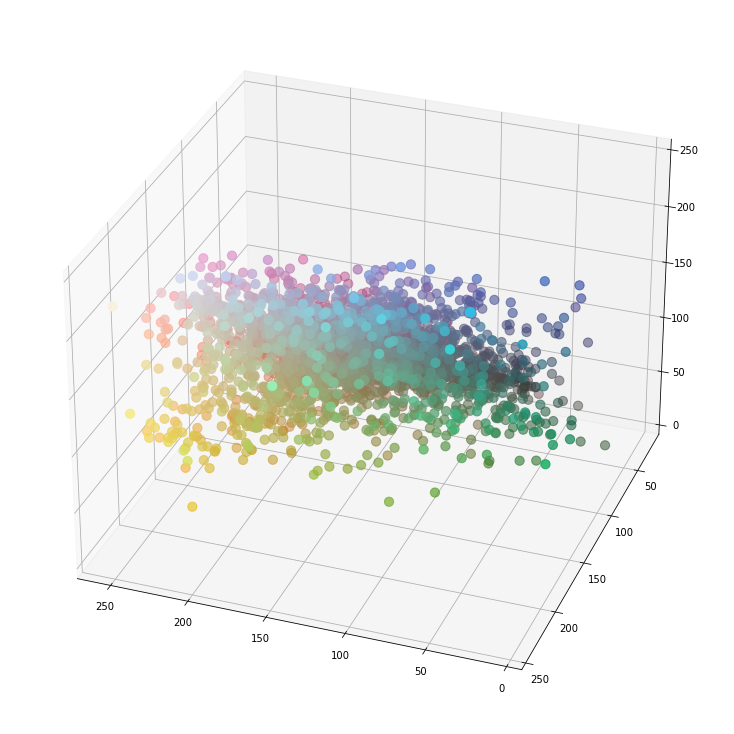

In [65]:
fig   = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(average_rgb[:,0],average_rgb[:,1],average_rgb[:,2],s=85,color=average_rgb/255)
ax.view_init(elev=30, azim=110)
fig.tight_layout(pad = 0)
plt.savefig('Fig_5_RGB.png', dpi=300,bbox_inches='tight', pad_inches=0)

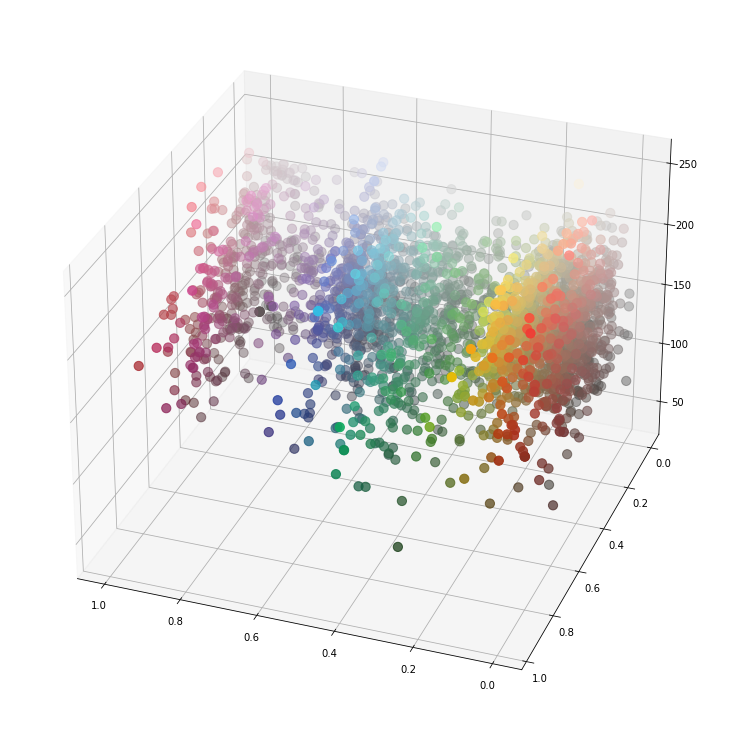

In [66]:
fig2   = plt.figure(figsize = (10, 10))
ax2 = fig2.add_subplot(projection='3d')
ax2.scatter(average_hsv[:,0],average_hsv[:,1],average_hsv[:,2],s=85,color=average_rgb/255)
ax2.view_init(elev=30, azim=110)
fig2.tight_layout(pad = 0)
plt.savefig('Fig_5_HSV.png', dpi=300,bbox_inches='tight', pad_inches=0)

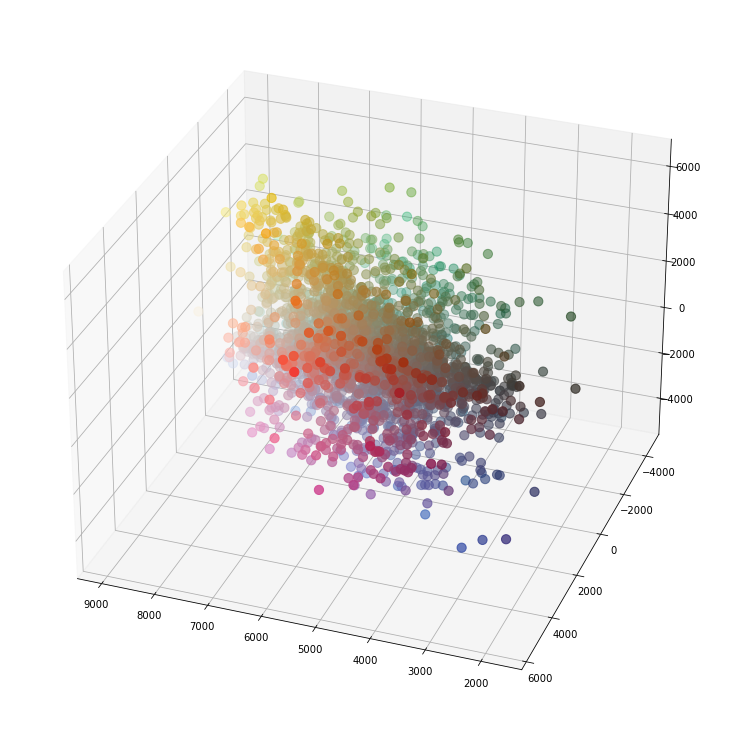

In [67]:
fig3   = plt.figure(figsize = (10, 10))
ax3 = fig3.add_subplot(projection='3d')
ax3.scatter(average_Lab[:,0],average_Lab[:,1],average_Lab[:,2],s=85,color=average_rgb/255)
ax3.view_init(elev=30, azim=110)
fig3.tight_layout(pad = 0)
plt.savefig('Fig_5_LAB.png', dpi=300,bbox_inches='tight', pad_inches=0)